# 桑汇阳

# 检测缺失值数量

In [1]:
import pandas as pd

# 读取数据
data = pd.read_excel('煤炭消费占比(未处理）.xlsx') #,sheet_name = "煤炭消费占比"

# 检测缺失值
missing_values = data.isnull().sum()
pd.DataFrame(missing_values)

,0
上海,0
江苏,0
浙江,1
安徽,1
江西,0
湖北,0
湖南,0
重庆,1
四川,0
贵州,1


In [2]:
missing_values = data.isnull()
missing_values

,上海,江苏,浙江,安徽,江西,湖北,湖南,重庆,四川,贵州,云南
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


# 数据预览

In [3]:
data

,上海,江苏,浙江,安徽,江西,湖北,湖南,重庆,四川,贵州,云南
0,0.374684,0.640214,0.590822,0.984306,0.702088,0.635614,0.543563,0.581668,0.459932,0.953057,0.769903
1,0.389267,0.708471,0.592042,0.954410,0.720510,0.680957,0.574846,0.584088,0.415402,0.951967,0.723560
2,0.358528,0.687366,NaN,0.924733,0.671744,0.638498,0.515502,NaN,0.412159,0.963740,0.674340
3,0.357666,0.683509,0.542671,0.956700,0.683374,0.553441,0.537381,0.514224,0.434207,1.048578,0.693811
4,0.315476,0.643729,0.524527,0.938859,0.663072,0.520311,0.508293,0.506717,0.396887,0.965074,0.592665
5,0.308966,0.639872,0.503619,NaN,0.649488,0.509295,0.503411,0.465368,0.344326,NaN,0.531451
6,0.293905,0.641935,0.491389,0.885960,0.616375,0.482570,0.518153,0.434412,0.322493,1.017161,0.498231
7,0.287291,0.601693,0.484421,0.882367,0.610758,0.473311,0.517797,0.456440,0.290318,0.989116,0.473231
8,0.275681,0.573682,0.467305,0.895793,0.605976,0.475291,0.501918,0.428189,0.268841,0.854658,0.456211
9,0.258841,0.546871,0.436271,0.860031,0.590947,0.485454,0.476052,0.403632,0.265006,0.836366,0.442559


# 数据插值示例

y1: [0.52006082]
 y2: [0.51755818]
 y3: [0.48568505]
 y4:[0.37473728]


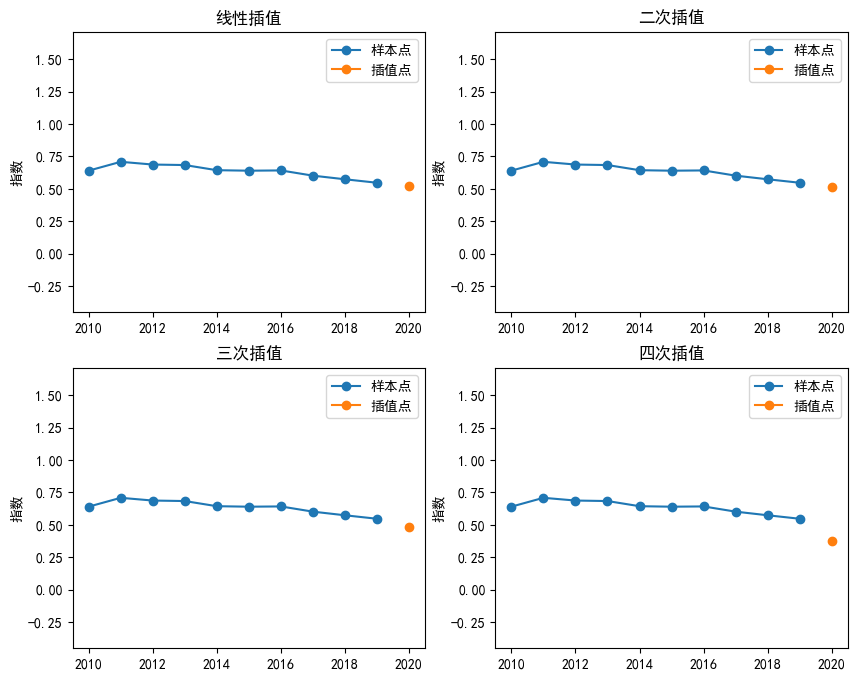

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as spi

# matplotlib.use('TkAgg')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据准备
X = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])#年份说明
# Y = np.array([1.3, 1.36, 1.41, 1.51, 1.64, 1.64, 1.5, 1.56, 1.6, 1.63, ])# 每一农村劳动力负担系数/人
# Y = np.array([2.985893417,3.044124817,3.037618942,2.945852535,2.826456895,2.701214575,2.232150227,2.189968478,2.167940228,2.173708552,2.169715815,2.157810627,2.151906481,2.109799224,2.065689271,])#城乡居民收入倍差/比值
Y = np.array([
0.640213526,
0.708470839,
0.687365879,
0.683508913,
0.643728939,
0.639872075,
0.641934613,
0.601692533,
0.573681685,
0.546871251,
])

# Y = np.array([1.53,1.89,1.81,1.53,1.45,1.45,1.39,1.51,1.54,1.51])# 每一城镇就业者负担系数/人

new_x = np.array([2020])#需要插值的年份

ipo1 = spi.splrep(X, Y, k=1)
y1 = spi.splev(new_x, ipo1)

ipo2 = spi.splrep(X, Y, k=2)
y2 = spi.splev(new_x, ipo2)

ipo3 = spi.splrep(X, Y, k=3)
y3 = spi.splev(new_x, ipo3)

ipo4 = spi.splrep(X, Y, k=4)
y4 = spi.splev(new_x, ipo4)
print(f"y1: {y1}\n y2: {y2}\n y3: {y3}\n y4:{y4}")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1, ax2 = axes[0, :]  # 获取第一行的两个Axes
ax3, ax4 = axes[1, :]  # 获取第二行的两个Axes

# 画图
ax1.plot(X, Y, '-o', label='样本点')
ax1.plot(new_x, y1, '-o', label='插值点')
ax1.set_ylim(Y.min() - 1, Y.max() + 1)
ax1.set_ylabel('指数')
ax1.set_title('线性插值')
ax1.legend()

ax2.plot(X, Y, '-o', label='样本点')
ax2.plot(new_x, y2, '-o', label='插值点')
ax2.set_ylim(Y.min() - 1, Y.max() + 1)
ax2.set_ylabel('指数')
ax2.set_title('二次插值')
ax2.legend()

ax3.plot(X, Y, '-o', label='样本点')
ax3.plot(new_x, y3, '-o', label='插值点')
ax3.set_ylim(Y.min() - 1, Y.max() + 1)
ax3.set_ylabel('指数')
ax3.set_title('三次插值')
ax3.legend()

ax4.plot(X, Y, '-o', label='样本点')
ax4.plot(new_x, y4, '-o', label='插值点')
ax4.set_ylim(Y.min() - 1, Y.max() + 1)
ax4.set_ylabel('指数')
ax4.set_title('四次插值')
ax4.legend()


plt.show()

# 插值后数据展示

In [5]:
import pandas as pd

# 读取数据
data = pd.read_excel('煤炭消费占比.xlsx',sheet_name = "煤炭消费占比")

# 检测缺失值
missing_values = data.isnull().sum()
pd.DataFrame(missing_values)

,0
上海,0
江苏,0
浙江,0
安徽,0
江西,0
湖北,0
湖南,0
重庆,0
四川,0
贵州,0


In [6]:
missing_values = data.isnull()
missing_values

,上海,江苏,浙江,安徽,江西,湖北,湖南,重庆,四川,贵州,云南
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


# 熵值法

In [7]:
import pandas as pd
import numpy as np
import os
# 熵值法
def Entory(path0, forwrd_indicator, inverse_indicator):
    # 对面板数据进行处理
    df = pd.read_excel(path0, sheet_name='Sheet2min-max标准化')
    df = df.set_index(["年份", "省份"])

    # 熵值法
    # 正、负向指标处理
    df4 = df.copy()
    forwrd_indicator = [i for i in forwrd_indicator]
    inverse_indicator = [i for i in inverse_indicator]
    if forwrd_indicator:
        inverse_indicator = list(set(forwrd_indicator) ^ set(df.columns))
    else:
        forwrd_indicator = list(set(inverse_indicator) ^ set(df.columns))

    if forwrd_indicator or inverse_indicator:
        df4[forwrd_indicator] = (df4[forwrd_indicator] - df4[forwrd_indicator].min()) / (
                df4[forwrd_indicator].max() - df4[forwrd_indicator].min())
        df4[inverse_indicator] = (df4[inverse_indicator].max() - df4[inverse_indicator]) / (
                df4[inverse_indicator].max() - df4[inverse_indicator].min())

    df4 = df4.apply(lambda x: x + 0.01)  # 为避免 ln0 的影响，进行数据平移,可根据个人需求自行修改数值
    df5 = df4 / df4.apply(lambda x: x.sum())  # 计算各个数据在对应列中所占比重
    k = np.power(np.log(df5.shape[0]), -1)  # 计算k
    p = df5 / df5.apply(lambda x: x.sum())
    P = (p * p.apply(np.log)).sum()  # 上面求熵值的公式中k的后面那一部分
    entory = -k * P  # 计算各列的熵值
    D = 1 - entory  # 计算各指标熵值的差异系数
    W = D / D.sum()  # 计算各指标权重
    # pd.set_option('display.max_columns', None)
    # pd.set_option('display.max_rows', None)
    # pd.set_option('display.width', 1000)
    # print(df4)
    # 根据上面计算的权重计算得分
    df['绿色信贷'] = df4[["A股上市环保企业新增银行贷款占比", "高能耗行业利息支出占比"]].mul(W[["A股上市环保企业新增银行贷款占比", "高能耗行业利息支出占比"]]).sum(axis=1)
    df['绿色证券'] = df4[["上市环保企业A股市值占比", "上市高能耗企业A股市值占比"]].mul(W[["上市环保企业A股市值占比", "上市高能耗企业A股市值占比"]]).sum(axis=1)
    df['绿色保险'] = df4[["规模环境污染保险", "环境污染保险赔偿比例"]].mul(W[["规模环境污染保险", "环境污染保险赔偿比例"]]).sum(axis=1)
    df['绿色投资'] = df4[["环境污染治理投资占比", "财政环保支出占比"]].mul(W[["环境污染治理投资占比", "财政环保支出占比"]]).sum(axis=1)

    W['绿色信贷'] = W[["A股上市环保企业新增银行贷款占比", "高能耗行业利息支出占比"]].sum()
    W['绿色证券'] = W[["上市环保企业A股市值占比", "上市高能耗企业A股市值占比"]].sum()
    W['绿色保险'] = W[["规模环境污染保险", "环境污染保险赔偿比例"]].sum()
    W['绿色投资'] = W[["环境污染治理投资占比", "财政环保支出占比"]].sum()

    # 计算能源结构优化指数
    df['绿色金融发展指数'] = df[["绿色信贷", "绿色证券", "绿色保险", "绿色投资"]].mul(W[["绿色信贷", "绿色证券", "绿色保险", "绿色投资"]]).sum(axis=1)

    # 将数据和结果写入Excel表格
    excel_to_path = os.path.join(os.path.split(path0)[0], "绿色金融发展指数.xlsx")
    with pd.ExcelWriter(path=excel_to_path) as writer:
        df.to_excel(writer, sheet_name='面板数据')
        W.to_excel(writer, sheet_name='权重')
    print("结果已保存到路径-{}-下".format(excel_to_path))


path0 = r"绿色金融_分析.xlsx"  # 目标文件路径
forwrd_indicator = ["A股上市环保企业新增银行贷款占比", "上市环保企业A股市值占比", "规模环境污染保险", "环境污染保险赔偿比例","环境污染治理投资占比","财政环保支出占比"]  # 正向指标。正负向指标填一个即可，为方便，可以填少的那个（自己填)
inverse_indicator = ["高能耗行业利息支出占比","上市高能耗企业A股市值占比"]  # 负向指标
Entory(path0, forwrd_indicator, inverse_indicator)

结果已保存到路径-绿色金融发展指数.xlsx-下


In [8]:
green_en = pd.read_excel("绿色金融发展指数.xlsx")
green_en

,年份,省份,A股上市环保企业新增银行贷款占比,高能耗行业利息支出占比,上市环保企业A股市值占比,上市高能耗企业A股市值占比,规模环境污染保险,环境污染保险赔偿比例,环境污染治理投资占比,财政环保支出占比,绿色信贷,绿色证券,绿色保险,绿色投资,绿色金融发展指数
0,2010,上海市,0.000000,0.416667,0.000000,0.157364,0.096785,0.148759,0.241522,0.423635,0.049087,0.018496,0.022114,0.044309,0.037657
1,2011,上海市,0.000218,0.199275,0.037594,0.231138,0.194920,0.141303,0.231295,0.255051,0.065623,0.023725,0.033008,0.032805,0.047329
2,2012,上海市,0.001855,0.164855,0.068117,0.211385,0.137295,0.396467,0.191650,0.498264,0.068915,0.029532,0.042029,0.045847,0.053396
3,2013,上海市,0.006178,0.155797,0.089720,0.210818,0.140731,0.205415,0.266982,0.184220,0.071418,0.033379,0.030681,0.030584,0.051407
4,2014,上海市,0.003914,0.052536,0.077261,0.220003,0.159146,0.218188,0.343062,0.407932,0.078277,0.030986,0.033596,0.049935,0.057363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,云南省,0.018763,0.974638,0.308794,0.061739,0.464123,0.257731,0.301575,0.534557,0.014767,0.075203,0.071310,0.055363,0.041963
117,2017,云南省,1.000000,0.936594,0.255844,0.037636,0.406633,0.259504,0.251381,0.513101,0.430143,0.066273,0.064768,0.050704,0.244479
118,2018,云南省,0.926418,0.965580,0.245048,0.035665,0.379474,0.417553,0.240147,0.235829,0.397017,0.064395,0.071342,0.032148,0.226437
119,2019,云南省,0.780664,0.934783,0.201152,0.030867,0.493392,0.243858,0.422593,0.313492,0.338074,0.056694,0.073843,0.049062,0.198316


In [9]:
green_en_p = pd.read_excel("绿色金融发展指数.xlsx",sheet_name = "权重")
green_en_p

,Unnamed: 0,0
0,A股上市环保企业新增银行贷款占比,0.420386
1,高能耗行业利息支出占比,0.075645
2,上市环保企业A股市值占比,0.177568
3,上市高能耗企业A股市值占比,0.019610
4,规模环境污染保险,0.115689
5,环境污染保险赔偿比例,0.061477
6,环境污染治理投资占比,0.065350
7,财政环保支出占比,0.064275
8,绿色信贷,0.496031
9,绿色证券,0.197178


# 多重共线性检验

In [10]:
DATA = pd.read_excel("中介效应指标.xlsx")

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming your data is stored in a DataFrame called 'df'

# Select the independent variables for VIF calculation
independent_vars = ['GF', 'ep', 'es', 'edp', 'er']

# Add a constant term to the data
X = add_constant(DATA[independent_vars])

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print(vif_data)

  Variable           VIF
0    const  11281.654548
1       GF      1.085682
2       ep      1.064757
3       es      6.528964
4      edp      6.426077
5       er      1.065789


# 描述性统计

In [11]:
# 假设数据已经读取到名为 data 的 DataFrame 中
mediating_variable = pd.read_excel("中介效应指标.xlsx",sheet_name = "中介变量")
summary = pd.DataFrame(mediating_variable.describe())
summary

,year,GF,ES,ep,es,edp,er
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2015.000000,0.072465,0.222418,4.618323,9.272469,0.296373,0.002212
std,3.175426,0.031447,0.060185,0.054642,0.521577,0.329231,0.001535
min,2010.000000,0.028811,0.122396,4.506060,8.467248,0.027020,0.000270
25%,2012.000000,0.057042,0.173401,4.581457,8.896826,0.098835,0.001205
50%,2015.000000,0.064741,0.218939,4.593604,9.107443,0.144894,0.001775
75%,2018.000000,0.078463,0.263162,4.663989,9.764298,0.437133,0.002496
max,2020.000000,0.244479,0.354773,4.746161,10.580035,1.472226,0.007720


# 多元线性回归

In [12]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 读取面板数据
data = pd.read_excel('原始面板数据.xlsx')
panel_model = smf.mixedlm("能源消费结构 ~ 绿色金融 + 能源价格 + 经济规模 + 对外开放程度 + 环境规制", data, groups=data["province"], re_formula="~year")

result = panel_model.fit()
print(result.summary())

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  能源消费结构  
No. Observations:    121      Method:              REML    
No. Groups:          11       Scale:               0.0011  
Min. group size:     11       Log-Likelihood:      136.3371
Max. group size:     11       Converged:           Yes     
Mean group size:     11.0                                  
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        33.690    3.756  8.968 0.000 26.327 41.052
绿色金融             -0.552    0.136 -4.046 0.000 -0.819 -0.284
能源价格              0.000    0.001  0.362 0.717 -0.001  0.001
经济规模              0.000    0.000  0.779 0.436 -0.000  0.000
对外开放程度           -0.017    0.055 -0.314 0.754 -0.124  0.090
环境规制             -0.431    2.914 -0.148 0.882 -6.142  5.280
Group Var         0.043  330.578                   

c:\users\22231\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# 数据可视化

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

# 绿色金融

In [16]:
# green_en = pd.read_excel("2010-2020长江经济带绿色金融指数.xlsx")
green_en = pd.read_excel("绿色金融.xlsx",sheet_name = "绿色金融发展指数")
# green_en = pd.read_excel("绿色金融发展指数.xlsx",sheet_name = "综合评分")
green_en

,绿色金融发展指数,上海市,江苏省,浙江省,安徽省,江西省,湖北省,湖南省,重庆市,四川省,贵州省,云南省
0,2010,0.037657,0.046366,0.078207,0.071771,0.051006,0.078159,0.050928,0.084500,0.054146,0.103234,0.034933
1,2011,0.047329,0.054306,0.086320,0.072394,0.057497,0.064313,0.057042,0.092518,0.056376,0.080948,0.041179
2,2012,0.053396,0.051669,0.079941,0.073965,0.055454,0.072793,0.060848,0.078463,0.060781,0.071744,0.040464
3,2013,0.051407,0.057604,0.089131,0.076111,0.055237,0.079308,0.062106,0.083782,0.067179,0.028811,0.049597
4,2014,0.057363,0.061245,0.086101,0.073405,0.052723,0.074336,0.061223,0.075039,0.054278,0.072876,0.047284
5,2015,0.056896,0.064741,0.100406,0.077646,0.054078,0.070722,0.066261,0.068675,0.057353,0.066525,0.039711
6,2016,0.051200,0.060288,0.102160,0.091813,0.061739,0.082634,0.060200,0.066547,0.056254,0.062486,0.041963
7,2017,0.062560,0.064214,0.104927,0.089274,0.059505,0.085096,0.063742,0.063691,0.059344,0.057502,0.244479
8,2018,0.066108,0.064116,0.104597,0.079212,0.058105,0.085810,0.066269,0.048526,0.061165,0.055810,0.226437
9,2019,0.065975,0.061376,0.110244,0.078797,0.071669,0.126065,0.066573,0.063562,0.058721,0.054989,0.198316


In [45]:
green_en_ =  pd.DataFrame() 
green_en_["年份"] = green_en["绿色金融发展指数"]
green_en_["上游地区"] = green_en["重庆市"] +green_en["四川省"] + green_en["贵州省"] + green_en["云南省"]
green_en_["中游地区"] = green_en["安徽省"] +green_en["江西省"] + green_en["湖北省"]
green_en_["下游地区"] = green_en["上海市"] +green_en["江苏省"] + green_en["浙江省"]

In [46]:
green_en_.to_excel("data.xlsx")
green_en_

,年份,上游地区,中游地区,下游地区
0,2010,0.276813,0.200935,0.162230
1,2011,0.271021,0.194204,0.187955
2,2012,0.251452,0.202212,0.185006
3,2013,0.229370,0.210656,0.198143
4,2014,0.249477,0.200464,0.204708
5,2015,0.232264,0.202446,0.222042
6,2016,0.227249,0.236186,0.213648
7,2017,0.425016,0.233875,0.231701
8,2018,0.391938,0.223127,0.234822
9,2019,0.375588,0.276531,0.237595


In [47]:
names = green_en.columns
names

Index(['绿色金融发展指数', '上海市', '江苏省', '浙江省', '安徽省', '江西省', '湖北省', '湖南省', '重庆市',
       '四川省', '贵州省', '云南省'],
      dtype='object')

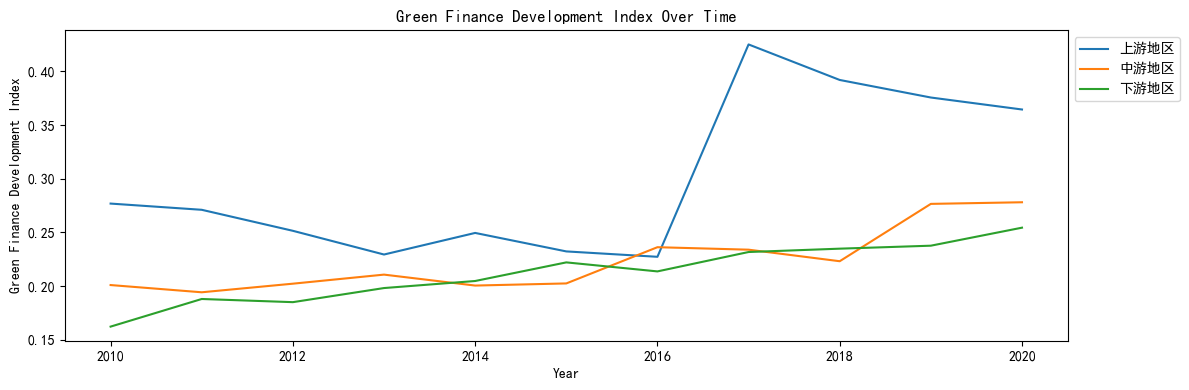

In [48]:
import matplotlib.pyplot as plt  
import colorsys  

# Generate a list of color codes  
parts = green_en_.columns
plt.figure(figsize=(12, 4))  
for i in range(1, len(parts)): 
    plt.plot(green_en_["年份"], green_en_[parts[i]], label=parts[i])  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot  
plt.title('Green Finance Development Index Over Time')  
plt.xlabel('Year')  
plt.ylabel('Green Finance Development Index')  
plt.tight_layout()  
plt.show()

In [49]:
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode
import pandas as pd

# 创建折线图
line = Line().add_xaxis(green_en_["年份"])

# 添加数据
for i in range(1,len(parts)):
    part = parts[i]
    line.add_yaxis(
        series_name = part,
        y_axis = list(green_en_[part]),
        label_opts=opts.LabelOpts(is_show=False),
        yaxis_index=0,
#         linestyle_opts=opts.LineStyleOpts(color=color),  # Specify line color using linestyle_opts
        is_smooth=False,
    )  
line.set_global_opts(
    title_opts=opts.TitleOpts(title="Green Finance Development Index Over Time",pos_top='top', pos_left='center'),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(name="Year", boundary_gap=False,min_=2010,max_=2020),
    yaxis_opts=opts.AxisOpts(name="Green Finance Development Index",type_="value",
#         axistick_opts=opts.AxisTickOpts(is_show=True),
#         splitline_opts=opts.SplitLineOpts(is_show=True),
                            ),
    legend_opts=opts.LegendOpts(pos_top="40"),# Position the legend outside the plot
)
line.render("green_finance_index_changjiangjjd.html")
line.render_notebook()

# 能源优化

In [50]:
en_p = pd.read_excel("能源结构优化.xlsx",sheet_name = "能源结构优化指数")
en_p

,年份,上海市,江苏省,浙江省,安徽省,江西省,湖北省,湖南省,重庆市,四川省,贵州省,云南省
0,2010,0.305431,0.203345,0.214997,0.090298,0.110904,0.128576,0.112693,0.166072,0.147479,0.051889,0.074098
1,2011,0.312276,0.210394,0.224702,0.104975,0.122585,0.135192,0.119011,0.174030,0.154129,0.059028,0.088391
2,2012,0.320669,0.220645,0.232092,0.116446,0.134713,0.143608,0.128832,0.186602,0.157343,0.068136,0.101877
3,2013,0.330788,0.231824,0.243491,0.126772,0.144513,0.168688,0.138678,0.213570,0.167613,0.078583,0.110047
4,2014,0.336462,0.240498,0.255565,0.135894,0.152296,0.177771,0.146899,0.225498,0.179088,0.090823,0.131416
5,2015,0.344287,0.254222,0.260121,0.145143,0.162577,0.189634,0.156886,0.251075,0.207564,0.104756,0.140816
6,2016,0.352156,0.263755,0.273232,0.160796,0.176262,0.198594,0.165241,0.260314,0.220938,0.116059,0.148090
7,2017,0.353720,0.285450,0.286004,0.171905,0.189155,0.208450,0.175129,0.268715,0.237653,0.131831,0.160697
8,2018,0.363667,0.302287,0.302115,0.193773,0.204938,0.218833,0.189188,0.281488,0.254025,0.163691,0.169687
9,2019,0.368177,0.308305,0.312064,0.204362,0.213691,0.226370,0.199017,0.291807,0.264554,0.173935,0.185735


In [51]:
en_p_ =  pd.DataFrame() 
en_p_["年份"] = en_p["年份"]
en_p_["上游地区"] = en_p["重庆市"] +en_p["四川省"] + en_p["贵州省"] + en_p["云南省"]
en_p_["中游地区"] = en_p["安徽省"] +en_p["江西省"] + en_p["湖北省"]
en_p_["下游地区"] = en_p["上海市"] +en_p["江苏省"] + en_p["浙江省"]

In [52]:
en_p_.to_excel("en_data.xlsx")
en_p_

,年份,上游地区,中游地区,下游地区
0,2010,0.439538,0.329779,0.723773
1,2011,0.475579,0.362752,0.747372
2,2012,0.513958,0.394767,0.773406
3,2013,0.569813,0.439973,0.806103
4,2014,0.626825,0.465961,0.832526
5,2015,0.704211,0.497354,0.858630
6,2016,0.745401,0.535652,0.889143
7,2017,0.798895,0.569509,0.925174
8,2018,0.868891,0.617545,0.968070
9,2019,0.916030,0.644422,0.988546


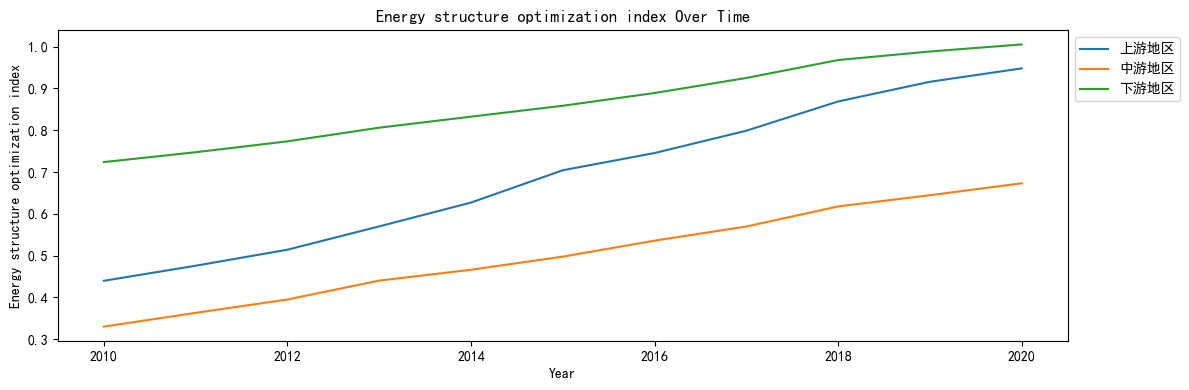

In [54]:
import matplotlib.pyplot as plt  
import colorsys  

# Generate a list of color codes  
parts = en_p_.columns
plt.figure(figsize=(12, 4))  
for i in range(1, len(parts)): 
    plt.plot(en_p_["年份"], en_p_[parts[i]], label=parts[i])  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot  
plt.title('Energy structure optimization index Over Time')  
plt.xlabel('Year')  
plt.ylabel('Energy structure optimization index')  
plt.tight_layout()  
plt.show()

In [56]:
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode
import pandas as pd

# 创建折线图
line = Line().add_xaxis(en_p_["年份"])

# 添加数据
for i in range(1,len(parts)):
    part = parts[i]
    line.add_yaxis(
        series_name = part,
        y_axis = list(en_p_[part]),
        label_opts=opts.LabelOpts(is_show=False),
        yaxis_index=0,
#         linestyle_opts=opts.LineStyleOpts(color=color),  # Specify line color using linestyle_opts
        is_smooth=False,
    )  
line.set_global_opts(
    title_opts=opts.TitleOpts(title="Energy structure optimization index Over Time",pos_top='top', pos_left='center'),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(name="Year", boundary_gap=False,min_=2010,max_=2020),
    yaxis_opts=opts.AxisOpts(name="Energy structure optimization index",type_="value",
#         axistick_opts=opts.AxisTickOpts(is_show=True),
#         splitline_opts=opts.SplitLineOpts(is_show=True),
                            ),
    legend_opts=opts.LegendOpts(pos_top="40"),# Position the legend outside the plot
)
line.render("Energy structure optimization index_changjiangjjd.html2")
line.render_notebook()

In [57]:
# te_ad = pd.read_excel("技术进步指数.xlsx",sheet_name = "综合评分")
te_ad = pd.read_excel("技术进步.xlsx",sheet_name = "技术进步指数")
te_ad

,年份,上海市,江苏省,浙江省,安徽省,江西省,湖北省,湖南省,重庆市,四川省,贵州省,云南省,0.0104391513836988
0,2010,0.140690,0.201167,0.078245,0.030367,0.022648,0.046208,0.024525,0.027267,0.044949,0.020303,0.010439,1.01
1,2011,0.161507,0.292779,0.125096,0.047209,0.029987,0.076147,0.038336,0.029264,0.057224,0.020008,0.014135,NaN
2,2012,0.186831,0.351535,0.159302,0.054915,0.034008,0.104173,0.042717,0.030091,0.074728,0.027147,0.020707,NaN
3,2013,0.205493,0.405989,0.178100,0.070292,0.041537,0.142048,0.059022,0.037915,0.099673,0.032872,0.019310,NaN
4,2014,0.228873,0.453864,0.203903,0.091770,0.050895,0.174436,0.071411,0.051350,0.122177,0.035633,0.021352,NaN
5,2015,0.241085,0.469441,0.230291,0.110038,0.056249,0.213341,0.094351,0.050565,0.139295,0.031236,0.022356,NaN
6,2016,0.256712,0.523868,0.265953,0.124975,0.056403,0.242623,0.100120,0.070488,0.163180,0.031121,0.023189,NaN
7,2017,0.267724,0.567353,0.300756,0.149795,0.071354,0.268958,0.119165,0.064305,0.194605,0.043952,0.027643,NaN
8,2018,0.311893,0.650901,0.382542,0.171035,0.095122,0.318372,0.140951,0.097191,0.296837,0.058287,0.029142,NaN
9,2019,0.357893,0.800006,0.460595,0.201207,0.120897,0.393976,0.169284,0.083021,0.322896,0.064967,0.029550,NaN


In [36]:
from pyecharts.charts import Map
from pyecharts import options as opts
import random

province = ['上海市', '江苏省', '浙江省', '安徽省', '江西省', '湖北省', '湖南省', '重庆市', '四川省', '贵州省', '云南省']

# Assuming te_ad is your data source
# data_province should only contain provinces with non-zero values
data_province = [(i, list(te_ad[i])) for i in province if any(val != 0 for val in te_ad[i])]

china_province = (
    Map()
    .add('', data_province, 'china')
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Provinces of China'),
        visualmap_opts=opts.VisualMapOpts(
            min_=0.01,
            max_=1.1,
            is_piecewise=True,
            range_color=['#C0FF3E', '#0E9A34']
        )
    )
)
china_province.render(path='china_province.html')
china_province.render_notebook()
